In [ ]:
!pip install "pillow<10.0.0"
!pip install --upgrade facenet-pytorch

  Using cached Pillow-9.5.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.5 kB)
Using cached Pillow-9.5.0-cp311-cp311-manylinux_2_28_x86_64.whl (3.4 MB)
  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
facenet-pytorch 2.6.0 requires Pillow<10.3.0,>=10.2.0, but you have pillow 9.5.0 which is incompatible.
scikit-image 0.25.2 requires pillow>=10.1, but you have pillow 9.5.0 which is incompatible.


ERROR: Operation cancelled by user
^C


Danh sách bounding box:
Khuôn mặt 1: [23, 13, 56, 57]
Khuôn mặt 2: [86, 13, 118, 55]
Khuôn mặt 3: [147, 15, 178, 57]
Khuôn mặt 4: [150, 178, 178, 221]
Khuôn mặt 5: [150, 97, 177, 139]
Khuôn mặt 6: [26, 180, 53, 218]
Khuôn mặt 7: [86, 179, 114, 216]
Khuôn mặt 8: [87, 96, 112, 131]
Khuôn mặt 9: [27, 98, 52, 132]


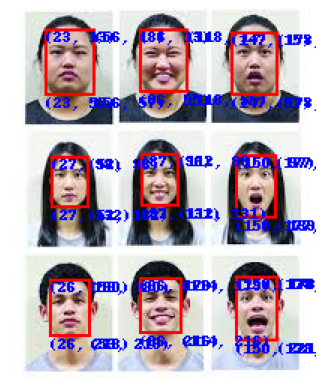

In [ ]:
import torch
from facenet_pytorch import MTCNN
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

mtcnn = MTCNN(keep_all=True, device='cuda' if torch.cuda.is_available() else 'cpu')

img = Image.open("/content/test.jpg")

boxes, probs = mtcnn.detect(img)

img_draw = img.copy()
draw = ImageDraw.Draw(img_draw)

if boxes is not None:
    print("Danh sách bounding box:")
    for i, box in enumerate(boxes):
        draw.rectangle(box.tolist(), outline="red", width=2)

        x1, y1, x2, y2 = box
        draw.text((x1, y1), f"({int(x1)}, {int(y1)})", fill="blue")
        draw.text((x2, y1), f"({int(x2)}, {int(y1)})", fill="blue")
        draw.text((x1, y2), f"({int(x1)}, {int(y2)})", fill="blue")
        draw.text((x2, y2), f"({int(x2)}, {int(y2)})", fill="blue")

        x1, y1, x2, y2 = map(int, box.tolist())
        bbox = [x1, y1, x2, y2]
        print(f"Khuôn mặt {i+1}: {bbox}")

plt.imshow(img_draw)
plt.axis("off")
plt.show()